<a href="https://colab.research.google.com/github/svetdio/swotify-thesis/blob/master/SWOTify_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SWOTIFY Sentiment Analysis


In [ ]:
# Installing necessary modules
# Only run this on the first execution

!pip install num2words wordcloud deep_translator emoji lazypredict --quiet

### Part 0: Module Imports and Configuration changes

This part handles the import of necessary modules used in this study. Modules included in this study are used in data manipulation and analysis, visualization, NLP, EDA, and tools that are necessary for data modeling for both supervised and unsupervised learning.

In [ ]:
# Import necessary modules

# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# NLP Tools
import nltk # General NLP tool
from nltk.tokenize import word_tokenize # For tokenization
from nltk.corpus import stopwords # For getting the stopwords
from num2words import num2words # To convert numbers and ordinals to words
from deep_translator import GoogleTranslator # To translate non english words
import spacy # For stopwords removal and lemmatization
import emoji # For emoji character manipulation

# EDA Tools
from sklearn.feature_extraction.text import CountVectorizer # for Document Term Matrix (DTM)
from wordcloud import WordCloud # For generating word cloud
from textwrap import wrap

# Sentiment Analysis Tools
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Preprocessing and Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Models
from lazypredict.Supervised import LazyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

# Metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

# Misc. Modules used in the Notebook
import re # Regular expressions
import string # String manipulation
import math # Math operations

# Download necessary word lexicons for this study
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Part 1: Data Loading and Cleansing

After collecting the data from our source, we will need to load our data into this notebook and clean the data according to the data analysis standards. This part involves the actual reading of data from the extracted data from SWOTIFY, and the steps for cleaning the dataset for executing the sentiment analysis

In [ ]:
# Load the data into dataframe (from web published csv file)
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS9ooD6LvK3nLUP_qJ-6wx_y2Z1OBtWcyIO7ZaaXRmOCuwcomIJjheaa5uumHLlr2C8sHP-U1Uloeuk/pub?gid=589911707&single=true&output=csv')

In [ ]:
# Show the dimensions of the dataframe
df.shape

(530, 21)

In [ ]:
df.head()

,Timestamp,Email Address,"DATA PRIVACY ACT\n\nTo ensure the protection of personal information collected through this Google Form, we are committed to complying with the provisions of Republic Act No. 10173 or the Data Privacy Act of 2012. This law protects the personal information of individuals by regulating its collection, use, storage, and distribution. \n\nWe take data privacy seriously and assure you that any information shared with us will be kept confidential and used only for the purpose stated in this form.\n\nBy clicking the ""Agree"", you consent to the use of your data for the said purpose in accordance with the Data Privacy Act.",FULL NAME: (Please select),POSITION,PRESENT DURING LOCAL CAF 2024?,I WANT TO EVALUATE:,He/She was well-prepared for his/her responsibilities during the Local CAF 2024?,He/She effectively communicated with his/her team members before and during the Local CAF 2024?,He/She was able to delegate tasks effectively and ensure he/she were completed on time?,...,He/She was able to adapt to unexpected challenges and changes before or during the Local CAF 2024?,He/She consistently displayed a positive and enthusiastic attitude throughout the Local CAF 2024?,Do you think he/she face any difficulties with communication or collaboration during the event?,"In any external factors that threatened the success of the event, did he/she respond relatively?",He/She did not effectively manage his/her time during the event?,He/She did not collaborate effectively with other CSG officers or committees?,He/She was not flexible in his/her approach to problem-solving during the Local CAF 2024?,He/She did not take responsibility for his/her mistakes or the mistakes of his/her team?,"Please answer in ENGLISH: \nWhat do you think is his/her greatest contribution and what opportunity did he/she unlock during Local CAF 2024 event? (Please insert ""N/A"" if none)","Do you have any comment, suggestion/s, and recommendation/s? (Please insert ""N/A"" if none)"
0,Timestamp,aubrianachanelle.buyo@cvsu.edu.ph,Agree,AUBRIANA CHANELLE M BUYO,SAP,"Yes, both 2 days",VAN ELLIS V. MERCADO,Strongly Agree,Strongly Agree,Strongly Agree,...,Strongly Agree,Strongly Agree,Disagree,Agree,Disagree,Disagree,Disagree,Disagree,She provided support for all the csg officers ...,N/a
1,Timestamp,jolomarco.ramos@cvsu.edu.ph,Agree,JOLO MARCO B. RAMOS,VP - EXTERNAL,"Yes, both 2 days",VAN ELLIS V. MERCADO,Strongly Agree,Strongly Agree,Agree,...,Strongly Agree,Strongly Agree,Agree,Agree,Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Leading,NaN
2,Timestamp,jolomarco.ramos@cvsu.edu.ph,Agree,JOLO MARCO B. RAMOS,VP - EXTERNAL,"Yes, both 2 days",HANS CHRISTIAN O. ANCIERTO,Neutral,Neutral,Neutral,...,Neutral,Neutral,Agree,Agree,Agree,Neutral,Disagree,Disagree,Listener,Be in time
3,Timestamp,jolomarco.ramos@cvsu.edu.ph,Agree,JOLO MARCO B. RAMOS,VP - EXTERNAL,"Yes, both 2 days",JOLO MARCO B. RAMOS,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Disagree,Disagree,Disagree,Disagree,Flexibility,NaN
4,Timestamp,jolomarco.ramos@cvsu.edu.ph,Agree,JOLO MARCO B. RAMOS,VP - EXTERNAL,"Yes, both 2 days",KARYLLE D. DELICANA,Agree,Strongly Agree,Agree,...,Neutral,Agree,Agree,Agree,Neutral,Disagree,Disagree,Disagree,Obedient,Just keep calm


In [ ]:
# Show the general view of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 21 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              

As seen in the `info()` output, there is a need to update the column names with a more concise and meaningful names to improve data accessibility during the cleaning process.

#### Part 1.1. Column Rename

In [ ]:
# Rename columns to a proper name
# Create first a dictionary as a map of the old column names and the new column names
cols_to_rename = {
    'Timestamp': 'timestamp',
    'Email Address': 'email',
    'DATA PRIVACY ACT\n\nTo ensure the protection of personal information collected through this Google Form, we are committed to complying with the provisions of Republic Act No. 10173 or the Data Privacy Act of 2012. This law protects the personal information of individuals by regulating its collection, use, storage, and distribution. \n\nWe take data privacy seriously and assure you that any information shared with us will be kept confidential and used only for the purpose stated in this form.\n\nBy clicking the "Agree", you consent to the use of your data for the said purpose in accordance with the Data Privacy Act.': 'data_privacy',
    'FULL NAME: (Please select)': 'evaluator',
    'POSITION': 'position',
    'PRESENT DURING LOCAL CAF 2024?': 'present',
    'I WANT TO EVALUATE:': 'evaluatee',
    'He/She was well-prepared for his/her responsibilities during the Local CAF 2024?': 'responsibility_rating',
    'He/She effectively communicated with his/her team members before and during the Local CAF 2024?': 'team_communication_rating',
    'He/She was able to delegate tasks effectively and ensure he/she were completed on time?': 'task_delegation_rating',
    'He/She remained calm and collected under pressure during the event?': 'calmness_rating',
    'He/She was able to adapt to unexpected challenges and changes before or during the Local CAF 2024?': 'adaptability_rating',
    'He/She consistently displayed a positive and enthusiastic attitude throughout the Local CAF 2024?': 'attitude_rating',
    'Do you think he/she face any difficulties with communication or collaboration during the event?': 'no_comm_collab_rating',
    'In any external factors that threatened the success of the event, did he/she respond relatively?': 'external_resp_rating',
    'He/She did not effectively manage his/her time during the event?': 'no_time_management_rating',
    'He/She did not collaborate effectively with other CSG officers or committees?': 'no_collab_rating',
    'He/She was not flexible in his/her approach to problem-solving during the Local CAF 2024?': 'no_flexible_rating',
    'He/She did not take responsibility for his/her mistakes or the mistakes of his/her team?': 'no_accountability_rating',
    'Please answer in ENGLISH: \nWhat do you think is his/her greatest contribution and what opportunity did he/she unlock during Local CAF 2024 event? (Please insert "N/A" if none)': 'event_contribution',
    'Do you have any comment, suggestion/s, and recommendation/s?  (Please insert "N/A" if none)': 'comment_feedback'
}

# Execute the rename using the dictionary
df = df.rename(columns=cols_to_rename)

# Output updated columns
df.columns

Index(['timestamp', 'email', 'data_privacy', 'evaluator', 'position',
       'present', 'evaluatee', 'responsibility_rating',
       'team_communication_rating', 'task_delegation_rating',
       'calmness_rating', 'adaptability_rating', 'attitude_rating',
       'no_comm_collab_rating', 'external_resp_rating',
       'no_time_management_rating', 'no_collab_rating', 'no_flexible_rating',
       'no_accountability_rating', 'event_contribution', 'comment_feedback'],
      dtype='object')

#### Part 1.2 Remove Unneeded Columns
After renaming the columns, we need to remove the columns that are not necessary to our study. As identified in the dataset, we need to remove the following:
- Timestamp
- Email Addresses (also in line with the data privacy act)
- Data Privacy Act (since all of data approved access to the data)


In [ ]:
# Drop unnecessary columns
# Set the columns to be dropped
columns_to_drop = ['timestamp','email','data_privacy']

# Check if columns to drop are still in the data frame
existing_cols = df.columns.intersection(columns_to_drop)

# If columns to drop is still in the dataframe, drop it in the dataframe
# Else, show info of not found or already removed
if len(existing_cols) > 0:
  df = df.drop(columns=existing_cols)
  display("Unnecessary columns removed")
else:
  display("Unnecessary columns not found or already removed")

'Unnecessary columns removed'

#### Part 1.3 Data Deduplication
Let us check now for duplicate values. For any duplicated values that we will see, we need to remove it so that it might not affect the performance of the further steps in this Sentiment Analysis

In [ ]:
# Check for duplicates
hasDuplicates = df.duplicated().any()

# If there are duplicates in the dataset, we will drop them
# Else, show an info of no duplicates
if hasDuplicates:
  df.drop_duplicates(inplace=True)
  display("Duplicates removed")
else:
  display("No duplicates")

'Duplicates removed'

#### Part 1.4 Data Type and Value Checking and Update
Let us check for the data in the columns to identify columns that needs to be re-mapped, type-casted, imputed, and cleaned

In [ ]:
# Check for each columns and check for the values generated
for col in df.columns:
  display(f"Check for column {col}: ")
  display(df[col].value_counts())
  display("=============================")

'Check for column evaluator: '

evaluator
JESSEL ANDREA D. MORALEDA      29
JULLIANE FAYE C. CORDERO       28
VAN ELLIS V. MERCADO           27
LOUBERT L. APIN                27
MIRALUNA DELA PEÑA             27
DAVE KENNETH C. TORRES         26
ALEX S. COSTA JR.              26
RHODA MAE C. PALEN             26
HANS CHRISTIAN O. ANCIERTO     26
ARNIE MONICA A. DEL ROSARIO    26
JOLO MARCO B. RAMOS            26
XENALYN S. BELENCIO            26
DJERRAMAINE MARIE RAMOS        26
RIO YSABEL O. ESTOPACE         26
KARYLLE D. DELICANA            25
CLINTON MALICDON               25
AUBRIANA CHANELLE M BUYO       25
MARJURIE ANNE A. GUIEB         23
TRACY MARGARETTE R. RAMENTO    19
KARL FIOLO S. CALMA            15
KRIZIA MAE C. TOLENTINO        11
MARIA EUNILA A. ORCASITAS       6
CHERRY BELLE R. GILANA          4
CHRISLYNNE SALAS                2
CARL JUSTIN I. JUNTILLA         1
Name: count, dtype: int64

'============================='

'Check for column position: '

position
SAP                 148
DOCU COMM            54
CREATIVES COMM       35
SOCENVI COMM         29
PRESIDENT            27
VP - EXTERNAL        26
STRAAW COMM          26
TREASURER            26
P.R.O.               26
TECHNICAL COMM       26
PROPERTY COMM        26
VP - INTERNAL        26
AUDITOR              26
SECRETARY            25
CIRCULATION COMM      2
Name: count, dtype: int64

'============================='

'Check for column present: '

present
Yes, both 2 days    502
Yes, only Day 2      26
Name: count, dtype: int64

'============================='

'Check for column evaluatee: '

evaluatee
VAN ELLIS V. MERCADO           27
KARYLLE D. DELICANA            24
JOLO MARCO B. RAMOS            23
MIRALUNA DELA PEÑA             23
HANS CHRISTIAN O. ANCIERTO     22
RHODA MAE C. PALEN             22
KARL FIOLO S. CALMA            22
DJERRAMAINE MARIE RAMOS        21
AUBRIANA CHANELLE M BUYO       21
MARJURIE ANNE A. GUIEB         21
KRIZIA MAE C. TOLENTINO        20
CHERRY BELLE R. GILANA         20
LOUBERT L. APIN                20
MARIA EUNILA A. ORCASITAS      20
ALEX S. COSTA JR.              20
XENALYN S. BELENCIO            20
TRACY MARGARETTE R. RAMENTO    19
CHRISLYNNE SALAS               19
ARNIE MONICA A. DEL ROSARIO    19
DAVE KENNETH C. TORRES         19
JULLIANE FAYE C. CORDERO       18
CLINTON MALICDON               18
CARL JUSTIN I. JUNTILLA        18
JESSEL ANDREA D. MORALEDA      18
EDGSEL G. SOLICITO             17
RIO YSABEL O. ESTOPACE         17
Name: count, dtype: int64

'============================='

'Check for column responsibility_rating: '

responsibility_rating
Strongly Agree       230
Agree                222
Neutral               48
Strongly Disagree     18
Disagree              10
Name: count, dtype: int64

'============================='

'Check for column team_communication_rating: '

team_communication_rating
Strongly Agree       218
Agree                206
Neutral               67
Strongly Disagree     23
Disagree              14
Name: count, dtype: int64

'============================='

'Check for column task_delegation_rating: '

task_delegation_rating
Agree                224
Strongly Agree       207
Neutral               60
Strongly Disagree     21
Disagree              16
Name: count, dtype: int64

'============================='

'Check for column calmness_rating: '

calmness_rating
Agree                225
Strongly Agree       206
Neutral               68
Strongly Disagree     19
Disagree              10
Name: count, dtype: int64

'============================='

'Check for column adaptability_rating: '

adaptability_rating
Agree                219
Strongly Agree       215
Neutral               64
Strongly Disagree     19
Disagree              11
Name: count, dtype: int64

'============================='

'Check for column attitude_rating: '

attitude_rating
Agree                225
Strongly Agree       212
Neutral               58
Strongly Disagree     19
Disagree              14
Name: count, dtype: int64

'============================='

'Check for column no_comm_collab_rating: '

no_comm_collab_rating
Neutral              187
Agree                139
Disagree              76
Strongly Disagree     70
Strongly Agree        56
Name: count, dtype: int64

'============================='

'Check for column external_resp_rating: '

external_resp_rating
Agree                247
Strongly Agree       132
Neutral              116
Strongly Disagree     21
Disagree              12
Name: count, dtype: int64

'============================='

'Check for column no_time_management_rating: '

no_time_management_rating
Disagree             259
Strongly Disagree    145
Neutral               75
Agree                 27
Strongly Agree        22
Name: count, dtype: int64

'============================='

'Check for column no_collab_rating: '

no_collab_rating
Disagree             254
Strongly Disagree    169
Neutral               53
Agree                 28
Strongly Agree        24
Name: count, dtype: int64

'============================='

'Check for column no_flexible_rating: '

no_flexible_rating
Disagree             260
Strongly Disagree    163
Neutral               69
Strongly Agree        20
Agree                 16
Name: count, dtype: int64

'============================='

'Check for column no_accountability_rating: '

no_accountability_rating
Disagree             259
Strongly Disagree    188
Neutral               51
Strongly Agree        16
Agree                 14
Name: count, dtype: int64

'============================='

'Check for column event_contribution: '

event_contribution
n/a\n                                                                                                                                                                                               9
Hard Working                                                                                                                                                                                        6
Listener                                                                                                                                                                                            5
na                                                                                                                                                                                                  4
Leading                                                                                                                                                                                      

'============================='

'Check for column comment_feedback: '

comment_feedback
n/a\n                                                                                                                                                                                                                                                              11
na                                                                                                                                                                                                                                                                  6
Na                                                                                                                                                                                                                                                                  3
N/A\n                                                                                                                                                                                                

'============================='

After checking the dataset, the following steps must be done on the following columns
- All rating columns shall be replaced with its numerical equivalent
- `event_contribution` and `comment_feedback` shall be subjected to series of multiple NLP process to standardize format this includes:
    - Change case to lowercase
    - Imputation of blank and/or N/A values
    - Translation from Tagalog to English language
    - Removal of punctuation, special characters (i.e. emojis, emoticons)
    - Remove contractions and numerical texts

For the first step, we need to convert all columns to its numerical equivalent. As noticed in the dataframe, there are two types of ratings:
- Positive Rating (5 = Strongly Agree, 1 = Strongly Disagree)
- Negative Rating (1 = Strongly Agree, 5 = Strongly Disagree)

As we have identified, the following columns will be re-mapped to its positive rating, while the rest will be re-mapped to the negative rating

<table>
<tr>
  <th>Positive Rating</th>
  <th>Negative Rating</th>
</tr>
<tr valign='top'>
  <td>
    <p><code>responsibility_rating</code></p>
    <p><code>team_communication_rating</code></p>
    <p><code>task_delegation_rating</code></p>
    <p><code>calmness_rating</code></p>
    <p><code>adaptability_rating</code></p>
    <p><code>attitude_rating</code></p>
    <p><code>external_resp_rating</code></p>
  </td>
  <td>
    <p><code>no_comm_collab_rating</code></p>
    <p><code>no_time_management_rating</code></p>
    <p><code>no_collab_rating</code></p>
    <p><code>no_flexible_rating</code></p>
    <p><code>no_accountability_rating</code></p>
  </td>
</tr>
</table>


In [ ]:
# Update those column with the right data

# For positive type of rating columns
positive_rating_value = {
    'Strongly Agree': 5,
    'Agree': 4,
    'Neutral': 3,
    'Disagree': 2,
    'Strongly Disagree': 1
}

# Replace values of the column based on the positive rating value map
df['responsibility_rating'] = df['responsibility_rating'].replace(positive_rating_value)
df['team_communication_rating'] = df['team_communication_rating'].replace(positive_rating_value)
df['task_delegation_rating'] = df['task_delegation_rating'].replace(positive_rating_value)
df['calmness_rating'] = df['calmness_rating'].replace(positive_rating_value)
df['adaptability_rating'] = df['adaptability_rating'].replace(positive_rating_value)
df['attitude_rating'] = df['attitude_rating'].replace(positive_rating_value)
df['attitude_rating'] = df['attitude_rating'].replace(positive_rating_value)
df['external_resp_rating'] = df['external_resp_rating'].replace(positive_rating_value)


For the negative ratings, we need to inverse the values of the negative rated question to improve readability of our data and make it easy for us to provide insights to the data

In [ ]:
# For negative type of rating columns
negative_rating_value = {
    'Strongly Agree': 'Strongly Disagree',
    'Agree': 'Disagree',
    'Neutral': 'Neutral',
    'Disagree': 'Agree',
    'Strongly Disagree': "Strongly Agree"
}

# Replace values of the column based on the negative rating value map
df['no_comm_collab_rating'] = df['no_comm_collab_rating'].replace(negative_rating_value)
df['no_time_management_rating'] = df['no_time_management_rating'].replace(negative_rating_value)
df['no_collab_rating'] = df['no_collab_rating'].replace(negative_rating_value)
df['no_flexible_rating'] = df['no_flexible_rating'].replace(negative_rating_value)
df['no_accountability_rating'] = df['no_accountability_rating'].replace(negative_rating_value)

# Replace values of the column based on the positive rating value map
df['comm_collab_rating'] = df['no_comm_collab_rating'].replace(positive_rating_value)
df['time_management_rating'] = df['no_time_management_rating'].replace(positive_rating_value)
df['collab_rating'] = df['no_collab_rating'].replace(positive_rating_value)
df['flexible_rating'] = df['no_flexible_rating'].replace(positive_rating_value)
df['accountability_rating'] = df['no_accountability_rating'].replace(positive_rating_value)

In [ ]:
# We need to remove the columns that are negatively-rated
negative_rated_cols = ["no_comm_collab_rating", "no_time_management_rating", "no_collab_rating", "no_flexible_rating", "no_accountability_rating"]
df = df.drop(columns=negative_rated_cols)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 0 to 529
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   evaluator                  528 non-null    object
 1   position                   528 non-null    object
 2   present                    528 non-null    object
 3   evaluatee                  528 non-null    object
 4   responsibility_rating      528 non-null    int64 
 5   team_communication_rating  528 non-null    int64 
 6   task_delegation_rating     528 non-null    int64 
 7   calmness_rating            528 non-null    int64 
 8   adaptability_rating        528 non-null    int64 
 9   attitude_rating            528 non-null    int64 
 10  external_resp_rating       528 non-null    int64 
 11  event_contribution         211 non-null    object
 12  comment_feedback           178 non-null    object
 13  comm_collab_rating         528 non-null    int64 
 14  time_management

Before proceeding with necessary cleaning steps on `comment_feedback` and `event_contribution`, we need to first change the casing of the columns to lowercase to ensure easier manipulation


In [ ]:
# Transform the columns into lower case
df['comment_feedback'] = df['comment_feedback'].str.lower()
df['event_contribution'] = df['event_contribution'].str.lower()

#### Part 1.5 Null Check and Imputation

In [ ]:
# Check for null values in the dataframe
df.isna().any()

evaluator                    False
position                     False
present                      False
evaluatee                    False
responsibility_rating        False
team_communication_rating    False
task_delegation_rating       False
calmness_rating              False
adaptability_rating          False
attitude_rating              False
external_resp_rating         False
event_contribution            True
comment_feedback              True
comm_collab_rating           False
time_management_rating       False
collab_rating                False
flexible_rating              False
accountability_rating        False
dtype: bool

Let us now impute null values in the `comment_feedback` and `event_contribution` columns

In [ ]:
# Check for blank/null data in each columns, if there are blank columns, impute accordingly
# Impute null/blank values to 'no review'
df['comment_feedback'].fillna(value='no review', inplace=True)
df['event_contribution'].fillna(value='no review', inplace=True)

There are implicit values that means no review. For this case, we need to standardize these values to 'no review'. We will create a map of values to be replaced with 'no review'

In [ ]:
# Create map for replacing no review
replace_na =  {
    'n/a': 'no review',
    'na': 'no review',
    'n/a\n': 'no review',
    'm/a': 'no review'
}

df['comment_feedback'] = df['comment_feedback'].replace(replace_na)
df['event_contribution'] = df['event_contribution'].replace(replace_na)

This code filters the DataFrame to remove rows where both the `comment_feedback` and `event_contribution` columns contain the value 'no review', effectively dropping entries with no meaningful feedback or contribution.

In [ ]:
# Dropping rows with 'no review' values
df = df[(df['comment_feedback'] != 'no review') & (df['event_contribution'] != 'no review')]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 2 to 514
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   evaluator                  118 non-null    object
 1   position                   118 non-null    object
 2   present                    118 non-null    object
 3   evaluatee                  118 non-null    object
 4   responsibility_rating      118 non-null    int64 
 5   team_communication_rating  118 non-null    int64 
 6   task_delegation_rating     118 non-null    int64 
 7   calmness_rating            118 non-null    int64 
 8   adaptability_rating        118 non-null    int64 
 9   attitude_rating            118 non-null    int64 
 10  external_resp_rating       118 non-null    int64 
 11  event_contribution         118 non-null    object
 12  comment_feedback           118 non-null    object
 13  comm_collab_rating         118 non-null    int64 
 14  time_management

#### Part 1.6. Translation
Since there are entries that are written in Filipino, we need to translate the following texts into English for easier application of Sentiment Analysis. We will be using `deep_translate.GoogleTranslator` module to translate each identified texts

In [ ]:
# Function to translate text
def translate_text(text):
  translated = GoogleTranslator(source='filipino', target='en').translate(text)
  return translated

# Translate the columns for non-English texts
df['new_comment_feedback'] = df['comment_feedback'].apply(translate_text)
df['new_event_contribution'] = df['event_contribution'].apply(translate_text)

#### Part 1.7 Contraction Removal

After translating the non-English words in the columns, we will remove contractions in the dataset as this will help in ensuring that stopwords are properly removed.

In this implementation, we created a map of contractions, and for every instance of contractions in the column values, we will replace it with its expanded equivalent

In [ ]:
# Create list of contractions and its expanded form
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['new_comment_feedback'] = df['new_comment_feedback'].apply(lambda x:expand_contractions(x))
df['new_event_contribution'] = df['new_event_contribution'].apply(lambda x:expand_contractions(x))

#### Part 1.8 Punctuation Removal
After removing the contractions, we will need to remove the punctuations to help eliminate unnecessary symbols and make text more clean and simple.

In [ ]:
# Remove punctuations
punctuation_to_replace = string.punctuation.replace('[^\w\s]', '')

df['new_comment_feedback'] = df['new_comment_feedback'].apply(lambda x: ''.join([' ' if char in punctuation_to_replace else char for char in x]))
df['new_event_contribution'] = df['new_event_contribution'].apply(lambda x: ''.join([' ' if char in punctuation_to_replace else char for char in x]))

#### Part 1.9 Numerical Translation into Words

After removing punctuations, we will need to translate numbers and ordinals on values of our dataframe into text

In [ ]:
# Function to translate numbers into words
def translate_numbers(text):
  words = text.split()
  translated_words = []
  # Loop through the words in the columns
  for word in words:
    if word.isdigit(): # Check if the word is a digit
      # If it is a number, translate the number to words then append to translated_words variable
      translated_words.append(num2words(int(word)))
    elif word.endswith(('st', 'nd', 'rd', 'th')) and word[:-2].isdigit(): # Check if the word is an ordinal number (1st, 2nd, 3rd..)
      # If it is an ordinal number, translate the number to words then append to translated_words variable
      translated_number = num2words(int(word[:-2]), ordinal=True)
      translated_suffix = word[-2:]  # Get the ordinal suffix

      # Append translated number and suffix if it's not present
      if translated_suffix not in translated_number:
        translated_words.append(translated_number + translated_suffix)
      else:
        translated_words.append(translated_number)
    else:
      translated_words.append(word)

  return ' '.join(translated_words)

# Apply translation function to the 'text' column
df['new_comment_feedback'] = df['new_comment_feedback'].apply(translate_numbers)
df['new_event_contribution'] = df['new_event_contribution'].apply(translate_numbers)

#### Part 1.10 Emoji Removal
After translating numbers and ordinals into text, we need to remove the emoji on the feedback

In [ ]:
# We are using the emoji module to replace emoji with blanks

df['new_comment_feedback'] = df['new_comment_feedback'].apply(lambda s: emoji.replace_emoji(s, ''))
df['new_event_contribution'] = df['new_event_contribution'].apply(lambda s: emoji.replace_emoji(s, ''))

After the initial cleaning, we will need to transform again the values into lowercase, since the translation task changed some letter casing

In [ ]:
# Transform casing in lower case
df['new_comment_feedback'] = df['new_comment_feedback'].str.lower()
df['new_event_contribution'] = df['new_event_contribution'].str.lower()

#### Part 1.11 Cleaned Data Statistics
Let us now check the statistics of the columns, and check the final look of the dataframe before preprocessing and EDA

In [ ]:
# Describe the dataframe of categorical/textual data
df.describe(include = 'object').T

,count,unique,top,freq
evaluator,118,15,DJERRAMAINE MARIE RAMOS,25
position,118,11,SAP,35
present,118,1,"Yes, both 2 days",118
evaluatee,118,26,KARYLLE D. DELICANA,9
event_contribution,118,116,listener,2
comment_feedback,118,115,great work,2
new_comment_feedback,118,114,great work,2
new_event_contribution,118,116,listener,2


Based on the description of the data frame for categorical data, we see that:
- Most of the `comment_feedback` and `event_contribution` values are 'great work' and 'listener'
- Most of the respondents evaluated KARYLLE D. DELICANA
- The one with the most input is DJERRAMAINE MARIE RAMOS
- Most of the respondents were present for both 2 days
- Most of the respondents have position of SAP.


In [ ]:
# Describe the dataframe of numerical data
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
responsibility_rating,118.00,4.26,1.10,1.00,4.00,5.00,5.00,5.00
team_communication_rating,118.00,4.12,1.23,1.00,4.00,5.00,5.00,5.00
task_delegation_rating,118.00,4.08,1.20,1.00,4.00,4.50,5.00,5.00
calmness_rating,118.00,4.17,1.08,1.00,4.00,4.50,5.00,5.00
adaptability_rating,118.00,4.20,1.09,1.00,4.00,5.00,5.00,5.00
attitude_rating,118.00,4.19,1.13,1.00,4.00,5.00,5.00,5.00
external_resp_rating,118.00,4.14,1.02,1.00,4.00,4.00,5.00,5.00
comm_collab_rating,118.00,2.99,1.37,1.00,2.00,3.00,4.00,5.00
time_management_rating,118.00,3.92,1.16,1.00,3.25,4.00,5.00,5.00
collab_rating,118.00,4.02,1.21,1.00,4.00,4.00,5.00,5.00


Based on the description of the data frame for numerical data, we see that:
- Mean values for the positively rated questions were above the neutral rating, which means that most of the respondents rated their peers with a neutral to strongly agree
- Mean values for the negatively rated questions were above the neutral rating, which means that most of the respondents rated their peers with a neutral to strongly disagree
- As expected, there should be a very low variance in the dataset, as the standard deviations ranges around 0.9 to 1.0

Let us show the dataframe and its information after the cleaning process

In [ ]:
# Show the entire dataframe
df

,evaluator,position,present,evaluatee,responsibility_rating,team_communication_rating,task_delegation_rating,calmness_rating,adaptability_rating,attitude_rating,external_resp_rating,event_contribution,comment_feedback,comm_collab_rating,time_management_rating,collab_rating,flexible_rating,accountability_rating,new_comment_feedback,new_event_contribution
2,JOLO MARCO B. RAMOS,VP - EXTERNAL,"Yes, both 2 days",HANS CHRISTIAN O. ANCIERTO,3,3,3,3,3,3,4,listener,be in time,2,2,3,4,4,be on time,listener
4,JOLO MARCO B. RAMOS,VP - EXTERNAL,"Yes, both 2 days",KARYLLE D. DELICANA,4,5,4,3,3,4,4,obedient,just keep calm,2,3,4,4,4,just keep calm,obedient
6,JOLO MARCO B. RAMOS,VP - EXTERNAL,"Yes, both 2 days",RHODA MAE C. PALEN,4,4,4,3,3,3,4,communication on other orgs,keep calm,3,4,4,4,4,keep calm,communication on other orgs
8,JOLO MARCO B. RAMOS,VP - EXTERNAL,"Yes, both 2 days",AUBRIANA CHANELLE M BUYO,4,3,3,4,4,4,3,doing the task,collaborate until the end,2,3,2,4,3,collaborate until the end,doing the task
11,VAN ELLIS V. MERCADO,PRESIDENT,"Yes, both 2 days",JOLO MARCO B. RAMOS,5,5,5,5,5,5,1,he was gain so much respect and sponsorships f...,"good job, vp external!",3,5,5,5,5,good job vp external,he gained so much respect and sponsorships for...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,XENALYN S. BELENCIO,SAP,"Yes, both 2 days",MIRALUNA DELA PEÑA,4,4,5,5,5,5,4,"lahat, perfect sya. posting pubmats, informing...",salamat sa service mo,2,3,4,4,4,thank you for your service,everything he is perfect posting pubmats infor...
477,XENALYN S. BELENCIO,SAP,"Yes, both 2 days",EDGSEL G. SOLICITO,1,1,1,1,1,1,1,wala ata sya,ewan basta di ko sya nakita,1,1,1,1,1,i do not know i just did not see him,he is not there
503,XENALYN S. BELENCIO,SAP,"Yes, both 2 days",CHRISLYNNE SALAS,3,3,3,3,3,3,3,walang effort,"ni-neutral ko halos kasi di ko alam, di ko sya...",3,3,3,3,3,i almost neutralized it because i did not know...,no effort
509,XENALYN S. BELENCIO,SAP,"Yes, both 2 days",DAVE KENNETH C. TORRES,4,3,4,3,3,3,4,tech :)),"aware naman na si kuya dave, hoping for the best",2,2,2,3,4,brother dave is already aware hoping for the best,technology


In [ ]:
# Show final info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 2 to 514
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   evaluator                  118 non-null    object
 1   position                   118 non-null    object
 2   present                    118 non-null    object
 3   evaluatee                  118 non-null    object
 4   responsibility_rating      118 non-null    int64 
 5   team_communication_rating  118 non-null    int64 
 6   task_delegation_rating     118 non-null    int64 
 7   calmness_rating            118 non-null    int64 
 8   adaptability_rating        118 non-null    int64 
 9   attitude_rating            118 non-null    int64 
 10  external_resp_rating       118 non-null    int64 
 11  event_contribution         118 non-null    object
 12  comment_feedback           118 non-null    object
 13  comm_collab_rating         118 non-null    int64 
 14  time_management

### Part 2: Data Preprocessing and EDA

This part checks and prepares our data for further analysis. This part leverages the Natural Language Processing (NLP) Techniques to better understand the underlying details and sentiment of our data.

Before we start with the EDA and the preprocessing, let us check again our dataset's data types. From here, we can identify the necessary exploration that we might do in order to understand our data

In [ ]:
# Checking for the characteristics of our data
df.dtypes

evaluator                    object
position                     object
present                      object
evaluatee                    object
responsibility_rating         int64
team_communication_rating     int64
task_delegation_rating        int64
calmness_rating               int64
adaptability_rating           int64
attitude_rating               int64
external_resp_rating          int64
event_contribution           object
comment_feedback             object
comm_collab_rating            int64
time_management_rating        int64
collab_rating                 int64
flexible_rating               int64
accountability_rating         int64
new_comment_feedback         object
new_event_contribution       object
dtype: object

As seen above, we can group the Categorical data by grouping string values, and we can categorize numerical data from the data by grouping number values

Below will be the new data frames based on their groupings

In [ ]:
# Grouping categorical data
cat_data_df = df.select_dtypes(include=[object])

# Grouping numerical data
num_data_df = df.select_dtypes(include=['number'])

# Display the new data frames
display(cat_data_df.head(), num_data_df.head())

,evaluator,position,present,evaluatee,event_contribution,comment_feedback,new_comment_feedback,new_event_contribution
2,JOLO MARCO B. RAMOS,VP - EXTERNAL,"Yes, both 2 days",HANS CHRISTIAN O. ANCIERTO,listener,be in time,be on time,listener
4,JOLO MARCO B. RAMOS,VP - EXTERNAL,"Yes, both 2 days",KARYLLE D. DELICANA,obedient,just keep calm,just keep calm,obedient
6,JOLO MARCO B. RAMOS,VP - EXTERNAL,"Yes, both 2 days",RHODA MAE C. PALEN,communication on other orgs,keep calm,keep calm,communication on other orgs
8,JOLO MARCO B. RAMOS,VP - EXTERNAL,"Yes, both 2 days",AUBRIANA CHANELLE M BUYO,doing the task,collaborate until the end,collaborate until the end,doing the task
11,VAN ELLIS V. MERCADO,PRESIDENT,"Yes, both 2 days",JOLO MARCO B. RAMOS,he was gain so much respect and sponsorships f...,"good job, vp external!",good job vp external,he gained so much respect and sponsorships for...


,responsibility_rating,team_communication_rating,task_delegation_rating,calmness_rating,adaptability_rating,attitude_rating,external_resp_rating,comm_collab_rating,time_management_rating,collab_rating,flexible_rating,accountability_rating
2,3,3,3,3,3,3,4,2,2,3,4,4
4,4,5,4,3,3,4,4,2,3,4,4,4
6,4,4,4,3,3,3,4,3,4,4,4,4
8,4,3,3,4,4,4,3,2,3,2,4,3
11,5,5,5,5,5,5,1,3,5,5,5,5


#### Part 2.1. Basic EDA
This part delves on the characteristics of our dataset and some statistics of each columns related to our sentiment analysis. This covers the details that maybe important in identifying our approach in sentiment analysis and the models to be used in this study.


Let us check for the characteristics of our target feature in our Sentiment Analysis.

But before we do that, we need to feature engineer our target feature

In [ ]:
# Get the length of each feedback by character
df['char_length_comment_feedback'] = df['new_comment_feedback'].apply(len)
df['char_length_event_contribution'] = df['new_event_contribution'].apply(len)

# Get the length of each feedback by word
df['word_length_comment_feedback'] = df['new_comment_feedback'].apply(lambda x: len(x.split()))
df['word_length_event_contribution'] = df['new_event_contribution'].apply(lambda x: len(x.split()))

We will use a histogram to understand the distribution of our target feature in terms of the character and word count

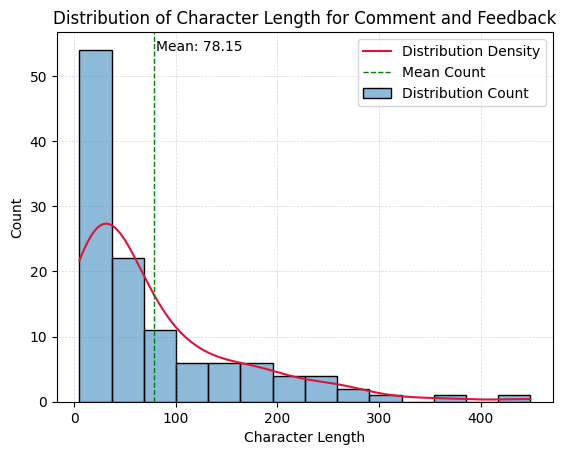

In [ ]:
# Use the histogram to create distribution for the character lengths
ax = sns.histplot(data=df, x='char_length_comment_feedback', kde=True)
ax.lines[0].set_color('crimson')
plt.grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5)
plt.axvline(df['char_length_comment_feedback'].mean(), color='green', linestyle = '--', linewidth = 1)

trans = ax.get_xaxis_transform()
plt.text(df['char_length_comment_feedback'].mean() + 2, 0.95, f"Mean: {df['char_length_comment_feedback'].mean():,.02f}", transform=trans)

plt.title('Distribution of Character Length for Comment and Feedback', wrap=True)
plt.xlabel('Character Length')
plt.legend(['Distribution Density', 'Mean Count', 'Distribution Count'], loc='upper right')
plt.ylabel('Count');

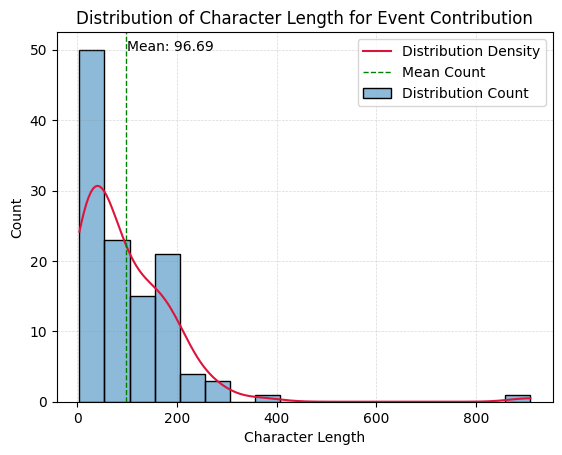

In [ ]:
# Use the histogram to create distribution for the character lengths
ax = sns.histplot(data=df, x='char_length_event_contribution', kde=True)
ax.lines[0].set_color('crimson')
plt.grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5)
plt.axvline(df['char_length_event_contribution'].mean(), color='green', linestyle = '--', linewidth = 1)

trans = ax.get_xaxis_transform()
plt.text(df['char_length_event_contribution'].mean() + 2, 0.95, f"Mean: {df['char_length_event_contribution'].mean():,.02f}", transform=trans)

plt.title('Distribution of Character Length for Event Contribution', wrap=True)
plt.xlabel('Character Length')
plt.legend(['Distribution Density', 'Mean Count', 'Distribution Count'], loc='upper right')
plt.ylabel('Count');


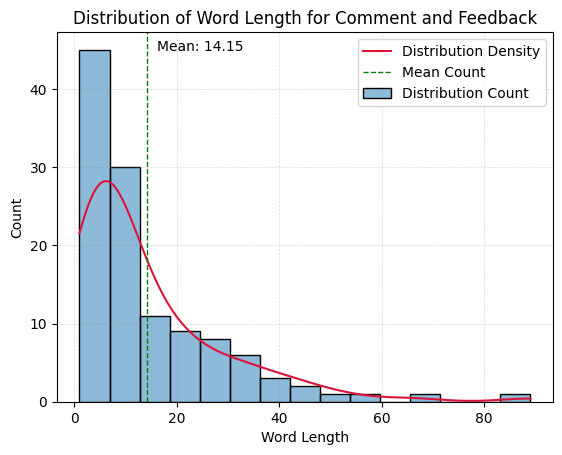

In [ ]:
# Use the histogram to create distribution for the word lengths
ax = sns.histplot(data=df, x='word_length_comment_feedback', kde=True)
ax.lines[0].set_color('crimson')
plt.grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5)
plt.axvline(df['word_length_comment_feedback'].mean(), color='green', linestyle = '--', linewidth = 1)

trans = ax.get_xaxis_transform()
plt.text(df['word_length_comment_feedback'].mean() + 2, 0.95, f"Mean: {df['word_length_comment_feedback'].mean():,.02f}", transform=trans)

plt.title('Distribution of Word Length for Comment and Feedback', wrap=True)
plt.xlabel('Word Length')
plt.legend(['Distribution Density', 'Mean Count', 'Distribution Count'], loc='upper right')
plt.ylabel('Count');


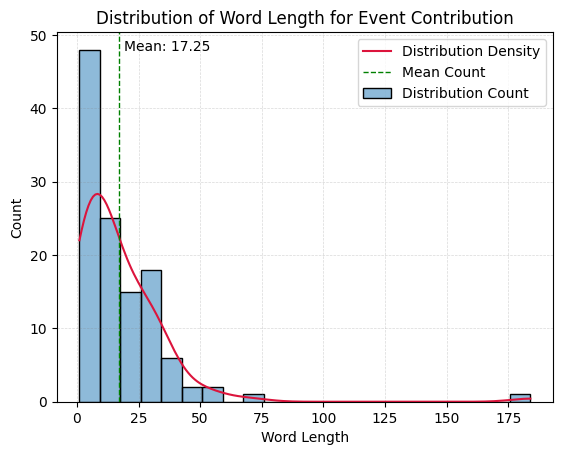

In [ ]:
# Use the histogram to create distribution for the word lengths
ax = sns.histplot(data=df, x='word_length_event_contribution', kde=True)
ax.lines[0].set_color('crimson')
plt.grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5)
plt.axvline(df['word_length_event_contribution'].mean(), color='green', linestyle = '--', linewidth = 1)

trans = ax.get_xaxis_transform()
plt.text(df['word_length_event_contribution'].mean() + 2, 0.95, f"Mean: {df['word_length_event_contribution'].mean():,.02f}", transform=trans)

plt.title('Distribution of Word Length for Event Contribution', wrap=True)
plt.xlabel('Word Length')
plt.legend(['Distribution Density', 'Mean Count', 'Distribution Count'], loc='upper right')
plt.ylabel('Count');


Let us find the distribution of numerical features in our data.

For this case, we will use a countplot to understand the distribution of the measures in our data


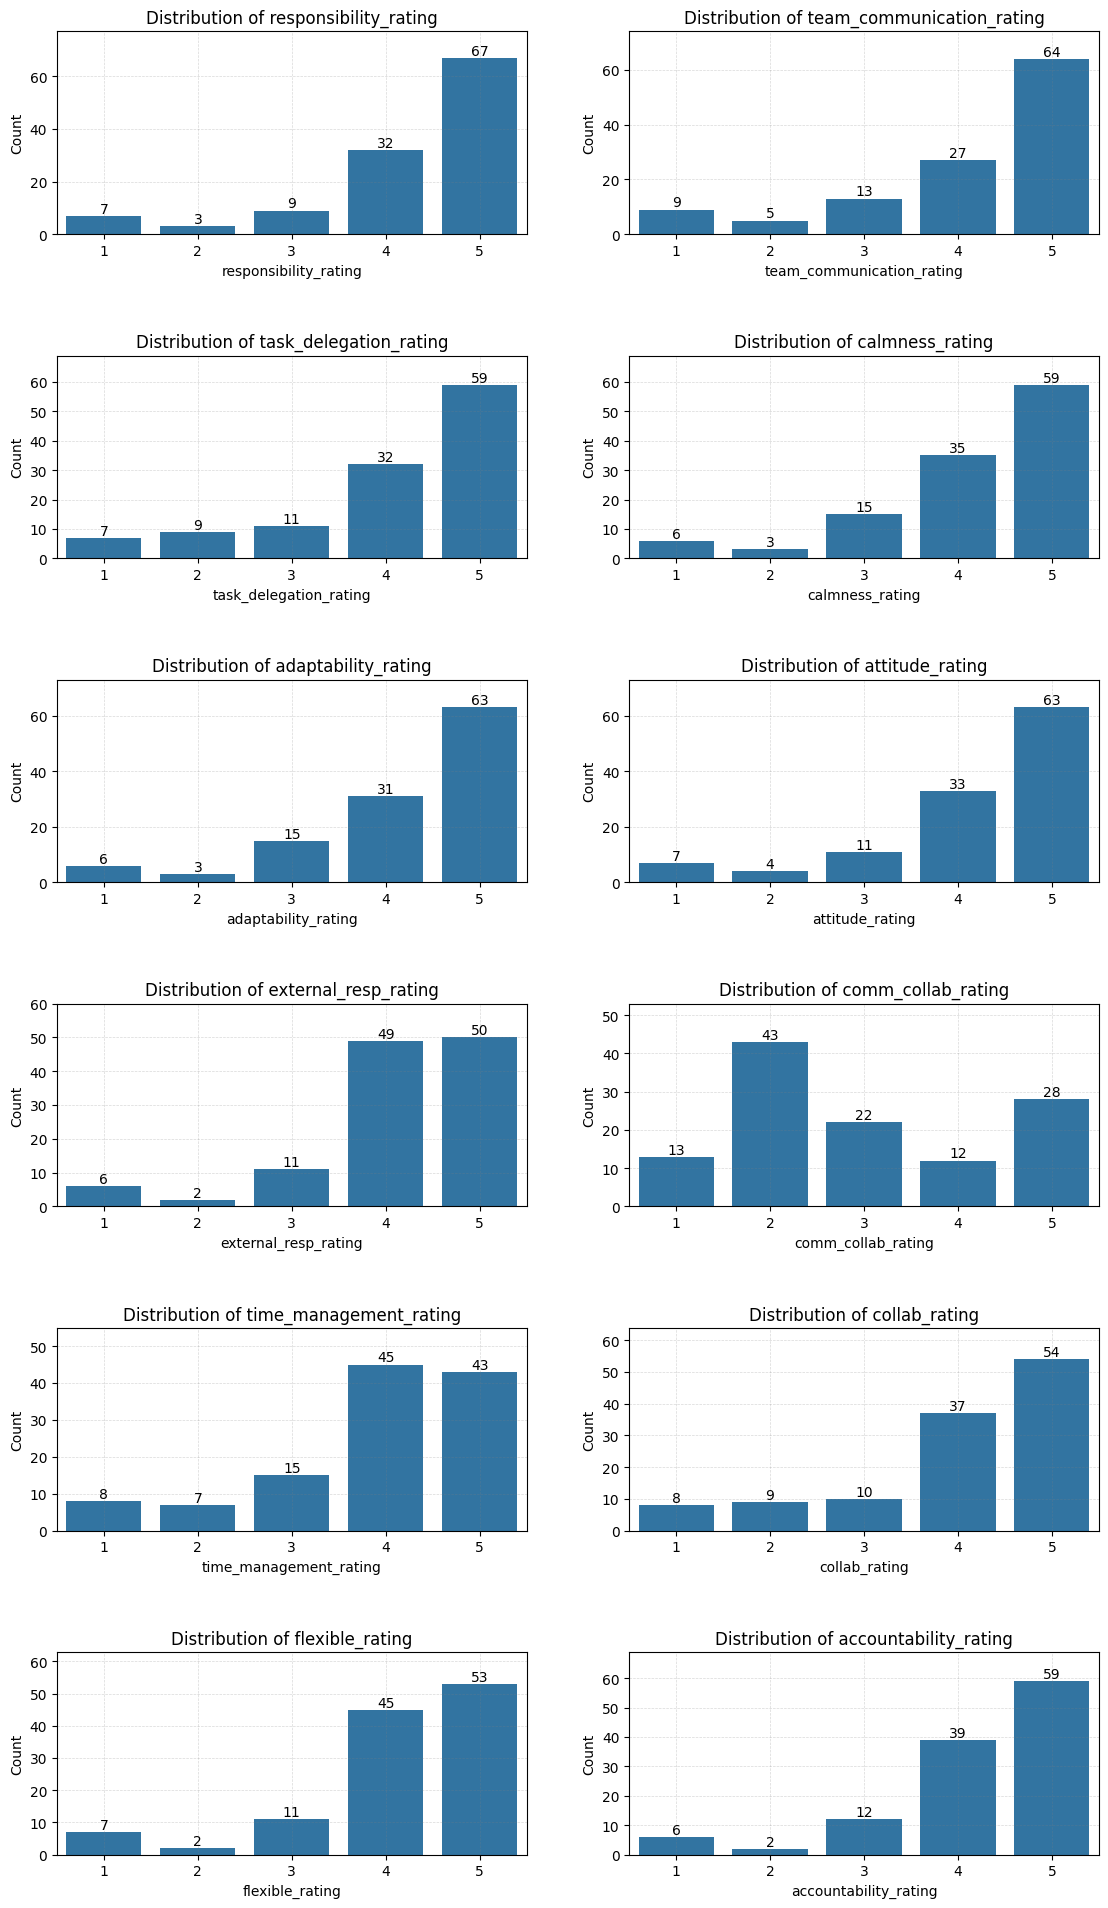

In [ ]:
cols = list(num_data_df.columns)

num_rows = int(len(cols)/2)
num_cols = 2

fig, ax = plt.subplots(num_rows, num_cols, figsize=(12, 20))

col_idx = 0
for row in range(num_rows):
  for col in range(num_cols):
    column_name = cols[col_idx]
    g = sns.countplot(data=num_data_df, x = column_name, ax=ax[row][col])
    ax[row][col].set_ylabel("Count")
    ax[row][col].set(ylim=(0, num_data_df[column_name].value_counts().max() + 10))
    ax[row][col].set_title(f'Distribution of {column_name}')
    ax[row][col].bar_label(ax[row][col].containers[0])
    ax[row][col].grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5)
    col_idx = col_idx + 1


plt.tight_layout(pad=4)
plt.show();

Now let's interpret the distribution of each rating columns.

*   In the `responsibility_rating` category, the majority of the ratings are allocated to 5, nearly 70 in count, indicating that most responses indicate `strongly agree`. Conversely, the lowest distribution is observed in the rating is 2, categorized as `disagree`, with between 3-5 instances only.
*   In the `team_communication_rating` category, the majority of the ratings are allocated to 5, with above 60 instances, indicating that most responses indicate `strongly agree`. Conversely, the lowest distribution is observed in the rating is 2, categorized as `disagree`, with only 5 instances in the distribution.
*   In the `task_delegation_rating` category, the majority of the ratings are allocated to 5, with almost 60 in count, indicating that most responses indicate `strongly agree`. Conversely, the lowest distribution is observed in the rating is 1, categorized as `strongly disagree`, with between 7-8 instances in the distribution.
*   In the `calmness_rating` category, the majority of the ratings are allocated to 5, with almost 60 in count, indicating that most responses indicate `strongly agree`. Conversely, the lowest distribution is observed in the rating is 1, categorized as `disagree`, with almost only 5 instances in the distribution.
*   In the `adaptability_rating` category, the majority of the ratings are allocated to 5, with above 60 instances, indicating that most responses indicate `strongly agree`. Conversely, the lowest distribution is observed in the rating is 1, categorized as `disagree`, with between 3-5 instances only.
*   In the `attitude_rating` category, the majority of the ratings are allocated to 5, with above 60 instances, indicating that most responses indicate `strongly agree`. Conversely, the lowest distribution is observed in the rating is 2, categorized as `disagree`, with only 5 instances in the distribution.
*   In the `comm_collab_rating` category, the majority of the ratings are allocated to 4, with above 40 instances in the distribution, indicating that most responses indicate `agree`. Conversely, the lowest distribution is observed in the rating is 2, categorized as `disagree`, with above 10 instances in the distribution.
*   In the `external_resp_rating` category, the majority of the ratings are both allocated to 4 and 5, with 50 instances in the distribution, indicating that most responses indicate as `agree` and `strongly agree`. Conversely, the lowest distribution is observed in the rating is 2, categorized as `disagree`, with below 5 instances in the distribution.
*   In the `time_management_rating` category, the majority of the ratings are allocated to 4, with above 40 instances in the distribution, indicating that most responses indicate as `agree`. Conversely, the lowest distribution is observed in the rating is 2, categorized as `disagree`, with almost 10 instances in the distribution.
*   In the `collab_rating` category, the majority of the ratings are allocated to 5, with above 50 instances in the distribution, indicating that most responses indicate as `strongly agree`. Conversely, the lowest distribution is observed in the rating is 1, categorized as `strongly disagree`, with almost 10 instances in the distribution.
*   In the `flexible_rating` category, the majority of the ratings are allocated to 5, with above 50 instances in the distribution, indicating that most responses indicate as `strongly agree`. Conversely, the lowest distribution is observed in the rating is 2, categorized as `disagree`, with almost 2-3 instances in the distribution.
*   In the `accountability_rating` category, the majority of the ratings are allocated to 5, with almost 60 instances in the distribution, indicating that most responses indicate as `strongly agree`. Conversely, the lowest distribution is observed in the rating is 2, categorized as `disagree`, with almost 2-3 instances in the distribution.


---



To understand the correlation of the ratings to one another, we will use a heatmap to understand the patterns and trends based on the ratings.

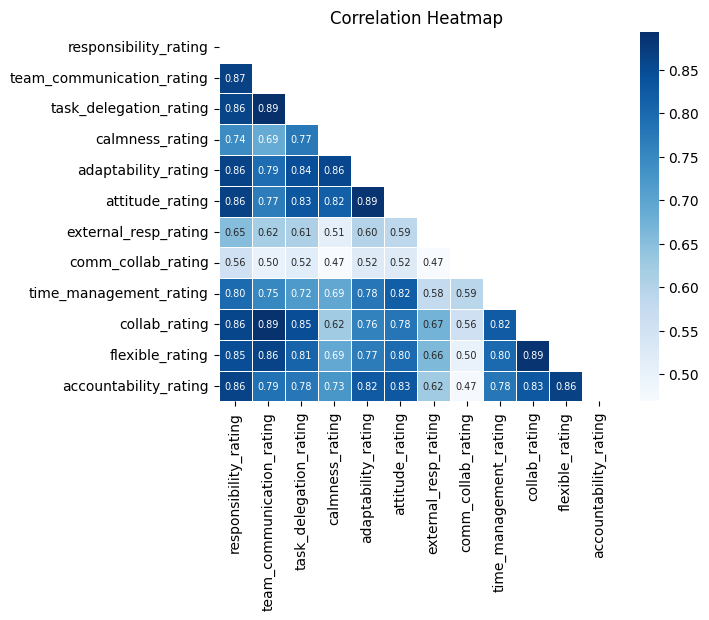

In [ ]:
# Identify the correlation using heatmap
corr = num_data_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap = 'Blues', annot = True, fmt=".2f", mask=mask, linewidths=.5, annot_kws={"size": 7});
plt.title('Correlation Heatmap');


Let us now explore our categorical data in our dataset, we can also use countplot to understand this

In [ ]:
num_data_df.to_csv("num_data.csv", index=False)

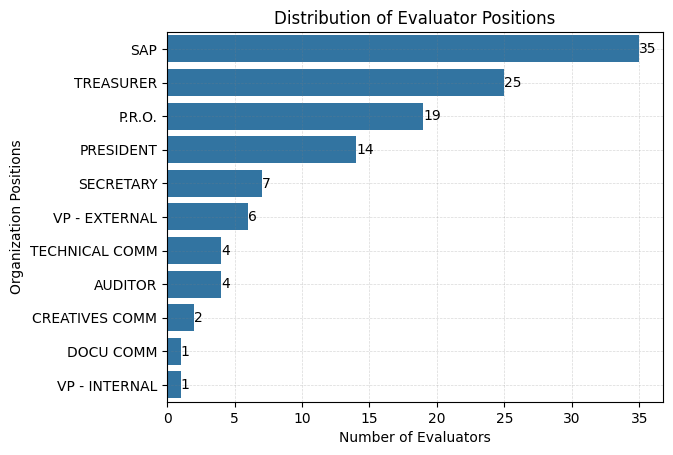

In [ ]:
# Checking for the distribution of the positions of the evaluators
ax = sns.countplot(cat_data_df, y='position', orient='x', order=cat_data_df['position'].value_counts(ascending=False).index);
plt.grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Evaluator Positions')
plt.xlabel('Number of Evaluators')
plt.ylabel('Organization Positions');
# ax.tick_params(axis='x', rotation=90)

For the preprocessing phase, we need to prepare the data to the format that we need in order to execute exploratory data analysis (EDA), which is essential in any machine learning problem. Since we are focusing on the Natural Language Processing (NLP) problem, we need to prepare the data that fits NLP.

In this case, we will preprocess our data through the following phases before implementing EDA.
1. Stop Words Removal
1. Tokenization / Lemmatization

First, we need to remove the stop words in the comments, as these words introduce noise to our data. Also, it can help, save memory, and improve the performance of NLP process that we are going to execute later

In [ ]:
# Get all the English stopwords
stop_words = stopwords.words('english')
# Show samples of the stop words
stop_words[:1000]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Now that we have identified the stop words, we can start now on tokenizing and lemmatizing the comments and feedback in the dataset:

- Tokenization is the process of splitting the [corpus](https://www.kdnuggets.com/2017/02/natural-language-processing-key-terms-explained.html) into tokens (individual words), which makes it helpful in executing word-level transformations

- Lemmatization is the process of capturing the canonical forms of the token based on the word's lemma
    - [Lemma](https://dictionary.cambridge.org/us/dictionary/english/lemma#:~:text=%CB%88lem.%C9%99%2F%20uk-,%2F%CB%88lem.%C9%99%2F,are%20placed%20in%20the%20table) is the form of a word that appears as an entry in a dictionary and is used to represent all other possible forms of the words

For this implementation, we are going to use `spaCy` module to tokenize and lemmatize our comments and feedback in the dataset

In [ ]:
# First we create a copy of the original dataframe
dtm_df = df.copy()

In [ ]:
# Load the spaCy NLP model
nlp = spacy.load('en_core_web_sm')

# Function to apply tokenization / lemmatization with stopwords removal, but skipping "no review" texts
def lemmatize_with_stopwords(text):
    if text == 'no review':
        return text  # Return the text unchanged
    else:
        # In this implementation, we are looping in to the text by using nlp() function to tokenize the text
        # For every loop in the token, we are checking if the token is in the list of stopwords, we skip the loop if it is a stopword
        # Else, if the token is not a stop word, then we are getting the lemma of the token by using the token.lemma_
        # After the loop, we are going to join each words by a space
        return ' '.join([token.lemma_ for token in nlp(text) if str(token) not in stop_words])  # Apply lemmatization with stopwords removal

# Apply lemmatization with stopwords removal, skipping "no review" texts
dtm_df['new_comment_feedback'] = dtm_df['new_comment_feedback'].apply(lemmatize_with_stopwords)
dtm_df['new_event_contribution'] = dtm_df['new_event_contribution'].apply(lemmatize_with_stopwords)

During the removal of stop words, there are instance where there are succeeding stop words in the corpus. This introduced blank values and might affect the performance of the EDA and other NLP tasks. For this case, we will remove the multiple spaces with a single space

In [ ]:
# Remove double space
dtm_df['new_comment_feedback'] = dtm_df['new_comment_feedback'].replace(r'\s+', ' ', regex=True)
dtm_df['new_event_contribution'] = dtm_df['new_event_contribution'].replace(r'\s+', ' ', regex=True)

#### Part 2.2: Document Term Matrix and Word Cloud Analysis

A Document Term Matrix (DTM) is a table that describes the frequency of terms that occur in a collection of documents. This creates a vector representation of a feedback based on the document.

DTM is an important part of the EDA process, as it shows the word distribution and frequency from a sentence-level up to a document-level sentiment analysis. This is also the precursor of the [Bag of Words (BoW)](https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/) approach for word embedding and several EDA methods in sentiment analysis.

In [ ]:
# Function definition for generating the wordcloud
def generate_wordcloud(data, title):
    wc = WordCloud(width=330, height=330, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(10, 8), facecolor='k')
    plt.imshow(wc)
    plt.axis("off")
    plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

Let us start to execute our DTM process

In [ ]:
# Concatenate text from 'comment_feedback' and 'suggestion' columns
dtm_df['dtm_comment_feedback'] = dtm_df['new_comment_feedback']
dtm_df['dtm_event_contribution'] = dtm_df['new_event_contribution']
dtm_df.drop_duplicates(subset=['dtm_comment_feedback', 'dtm_event_contribution'], inplace=True)

# Create CountVectorizer object
vectorizer_cf = CountVectorizer()
vectorizer_ec = CountVectorizer()

# Transform text data into Document-Term Matrix
dtm_cf = vectorizer_cf.fit_transform(dtm_df['dtm_comment_feedback'])
dtm_ec = vectorizer_ec.fit_transform(dtm_df['dtm_event_contribution'])

# Convert Document-Term Matrix to DataFrame

dtm_cf_new = pd.DataFrame(dtm_cf.toarray(), columns=vectorizer_cf.get_feature_names_out())
dtm_ec_new = pd.DataFrame(dtm_ec.toarray(), columns=vectorizer_ec.get_feature_names_out())

dtm_cf_new.index = dtm_df['dtm_comment_feedback']
dtm_ec_new.index = dtm_df['dtm_event_contribution']

# Display the DataFrame
print("DTM for Comments and Feedbacks:")
display(dtm_cf_new.head(5))

print("\nDTM for Event Contribution Feedback:")
display(dtm_ec_new.head(5))


DTM for Comments and Feedbacks:


,able,acad,academic,active,actively,activity,actually,additional,additionally,affect,...,wait,want,waste,way,we,well,work,would,ysabel,zone
dtm_comment_feedback,,,,,,,,,,,,,,,,,,,,,
time,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
keep calm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
keep calm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
collaborate end,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
good job vp external,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



DTM for Event Contribution Feedback:


,able,absent,acad,accommodate,accompany,acquire,act,action,activity,actual,...,we,well,whenever,without,witness,work,world,would,yeah,yes
dtm_event_contribution,,,,,,,,,,,,,,,,,,,,,
listener,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
obedient,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
communication org,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
task,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gain much respect sponsorship event,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Getting the vocabulary used for each of the target columns

print("Vocabulary for Comments and Feedbacks:")
display(dtm_cf_new.columns)

print("\Vocabulary for Event Contribution:")
display(dtm_ec_new.columns)

Vocabulary for Comments and Feedbacks:


Index(['able', 'acad', 'academic', 'active', 'actively', 'activity',
       'actually', 'additional', 'additionally', 'affect',
       ...
       'wait', 'want', 'waste', 'way', 'we', 'well', 'work', 'would', 'ysabel',
       'zone'],
      dtype='object', length=385)

\Vocabulary for Event Contribution:


Index(['able', 'absent', 'acad', 'accommodate', 'accompany', 'acquire', 'act',
       'action', 'activity', 'actual',
       ...
       'we', 'well', 'whenever', 'without', 'witness', 'work', 'world',
       'would', 'yeah', 'yes'],
      dtype='object', length=428)

In [ ]:
# Sum of comment_feedback column
dtm_cf_new.loc['total_cf'] = dtm_cf_new.sum()
sum_cf = pd.DataFrame(dtm_cf_new.loc['total_cf']).transpose()
sum_cf

,able,acad,academic,active,actively,activity,actually,additional,additionally,affect,...,wait,want,waste,way,we,well,work,would,ysabel,zone
total_cf,2,1,2,2,1,1,1,1,1,2,...,1,4,1,1,2,8,9,1,1,1


In [ ]:
# Sum of suggestion column
dtm_ec_new.loc['total_ec'] = dtm_ec_new.sum()
sum_ec = pd.DataFrame(dtm_ec_new.loc['total_ec']).transpose()
sum_ec

,able,absent,acad,accommodate,accompany,acquire,act,action,activity,actual,...,we,well,whenever,without,witness,work,world,would,yeah,yes
total_ec,15,1,1,2,1,1,1,1,1,4,...,3,10,1,1,1,10,1,4,1,1


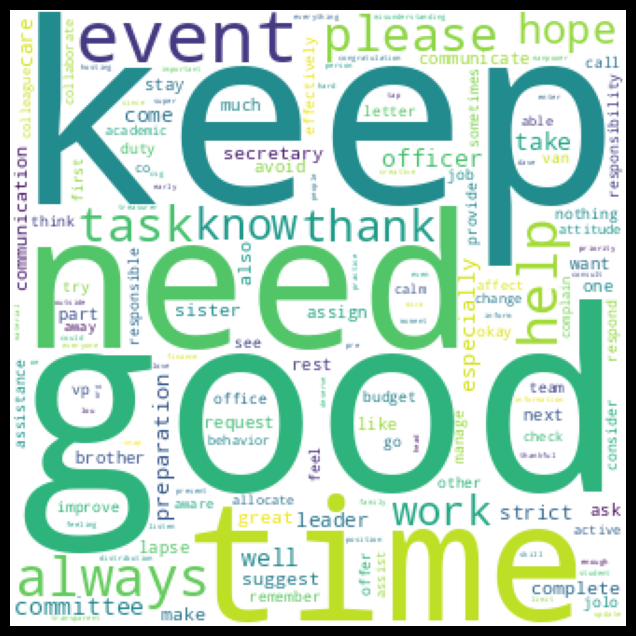

In [ ]:
# Sum of total comment_feedback column in a word cloud
generate_wordcloud(sum_cf.loc['total_cf'].transpose(), 'Word Cloud of Comments and Feedbacks')

In [ ]:
display(sum_cf.transpose().reset_index().sort_values(by=["total_cf", "index"], ascending=False).head())
display(sum_cf.transpose().reset_index().sort_values(by=["total_cf", "index"], ascending=True)[sum_cf.transpose().reset_index()['total_cf'] == sum_cf.transpose().reset_index()['total_cf'].min()]);

,index,total_cf
191,keep,20
154,good,20
229,need,19
362,time,16
131,event,15


,index,total_cf
1,acad,1
4,actively,1
5,activity,1
6,actually,1
7,additional,1
...,...,...
377,waste,1
378,way,1
382,would,1
383,ysabel,1


Based in the word cloud of values from `comment_feedback` column:
- The words KEEP, GOOD, NEED, TIME, EVENT are the top 5 words with the highest occurence in all comment and feedback column

Overall, it appears that the comments and feedback given to the evaluatees are good and are given within the context of the event. Also, feedbacks given are related to the time, regardless of the event.

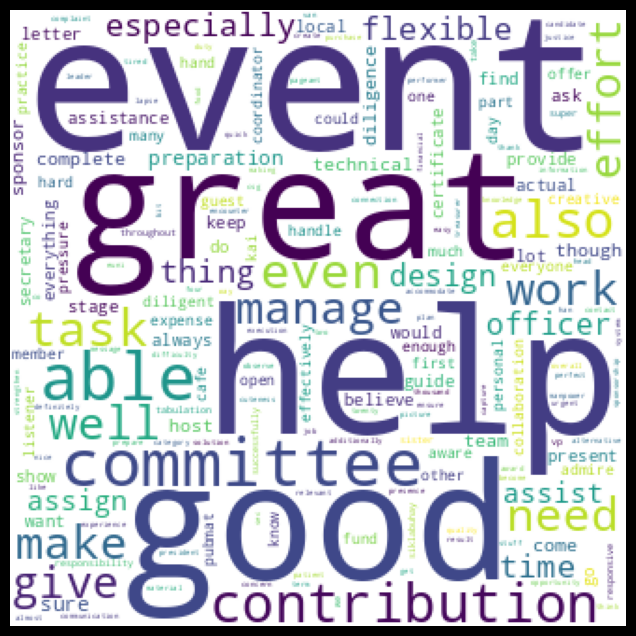

In [ ]:
# Sum of total event_contribution columns in a word cloud
generate_wordcloud(sum_ec.loc['total_ec'].transpose(), 'Word Cloud of Suggestions')

In [ ]:
display(sum_ec.transpose().reset_index().sort_values(by=["total_ec", "index"], ascending=False).head())
display(sum_ec.transpose().reset_index().sort_values(by=["total_ec", "index"], ascending=True)[sum_ec.transpose().reset_index()['total_ec'] == sum_ec.transpose().reset_index()['total_ec'].min()]);

,index,total_ec
143,event,27
181,help,22
170,good,19
171,great,17
75,committee,16


,index,total_ec
1,absent,1
2,acad,1
4,accompany,1
5,acquire,1
6,act,1
...,...,...
421,without,1
422,witness,1
424,world,1
426,yeah,1


Based in the word cloud of values from `event_contribution` column:
- The words EVENT, HELP, GOOD, GREAT, COMMITTEE are the top 5 words with the highest occurence in all `event_contribution` column

Overall, it appears that evaluators perceived their evaluatees to have helped greatly for the good of the event.

In [ ]:
dtm_df[dtm_df['evaluator'] == 'DJERRAMAINE MARIE RAMOS']

,evaluator,position,present,evaluatee,responsibility_rating,team_communication_rating,task_delegation_rating,calmness_rating,adaptability_rating,attitude_rating,...,flexible_rating,accountability_rating,new_comment_feedback,new_event_contribution,char_length_comment_feedback,char_length_event_contribution,word_length_comment_feedback,word_length_event_contribution,dtm_comment_feedback,dtm_event_contribution
70,DJERRAMAINE MARIE RAMOS,TREASURER,"Yes, both 2 days",VAN ELLIS V. MERCADO,5,5,4,5,5,5,...,5,5,strict come deadline especially budgetary requ...,able guide accommodate concern challenge encou...,165,181,27,30,strict come deadline especially budgetary requ...,able guide accommodate concern challenge encou...
71,DJERRAMAINE MARIE RAMOS,TREASURER,"Yes, both 2 days",HANS CHRISTIAN O. ANCIERTO,2,1,1,4,4,4,...,3,4,please communicate committee especially financ...,able assist guest need siklabuhay present thro...,246,121,36,18,please communicate committee especially financ...,able assist guest need siklabuhay present thro...
72,DJERRAMAINE MARIE RAMOS,TREASURER,"Yes, both 2 days",JOLO MARCO B. RAMOS,5,5,5,5,5,5,...,5,5,good,able contact sponsor provide detail also able ...,8,251,2,45,good,able contact sponsor provide detail also able ...
73,DJERRAMAINE MARIE RAMOS,TREASURER,"Yes, both 2 days",KARYLLE D. DELICANA,5,5,5,4,5,5,...,4,5,please communicate we feel pressured blame muc...,responsibility event especially handle letter ...,185,220,35,33,please communicate we feel pressured blame muc...,responsibility event especially handle letter ...
75,DJERRAMAINE MARIE RAMOS,TREASURER,"Yes, both 2 days",DJERRAMAINE MARIE RAMOS,4,5,4,4,4,3,...,4,4,need strict come request budget event activity...,think great contribution able task effectively...,186,193,33,35,need strict come request budget event activity...,think great contribution able task effectively...
76,DJERRAMAINE MARIE RAMOS,TREASURER,"Yes, both 2 days",RHODA MAE C. PALEN,4,3,2,2,2,4,...,4,3,possible please complete task early avoid over...,great contribution course evaluation encoding ...,261,99,42,17,possible please complete task early avoid over...,great contribution course evaluation encoding ...
77,DJERRAMAINE MARIE RAMOS,TREASURER,"Yes, both 2 days",MIRALUNA DELA PEÑA,4,5,4,5,5,5,...,5,5,well transparent strict feeling avoid misunder...,understand financial struggle adjust material ...,140,190,21,36,well transparent strict feeling avoid misunder...,understand financial struggle adjust material ...
78,DJERRAMAINE MARIE RAMOS,TREASURER,"Yes, both 2 days",AUBRIANA CHANELLE M BUYO,1,2,2,4,3,2,...,2,2,try observant surrounding finish assign task o...,enough effort,365,17,66,3,try observant surrounding finish assign task o...,enough effort
79,DJERRAMAINE MARIE RAMOS,TREASURER,"Yes, both 2 days",KARL FIOLO S. CALMA,2,2,2,4,3,4,...,3,3,suggest visit office frequently event preparat...,good,197,4,29,1,suggest visit office frequently event preparat...,good
80,DJERRAMAINE MARIE RAMOS,TREASURER,"Yes, both 2 days",XENALYN S. BELENCIO,4,1,2,4,4,4,...,1,3,ensure effective communication team proactivel...,present throughout preparation actual event si...,248,113,34,17,ensure effective communication team proactivel...,present throughout preparation actual event si...


### Part 3: Unsupervised Learning - Sentiment Scoring using NLTK and VADER

In this part, we will now determine the sentiment score of each `comment_feedback` and `event_contribution` columns in order to create a classification label for succeeding parts of this study.

We will be using `nltk`'s `SentimentIntensityAnalyzer` to generate the polarity of the mentioned columns. This implements VADER as the lexicon for identifying the polarity of each words in the

In [ ]:
# Instantiate SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

NameError: name 'SentimentIntensityAnalyzer' is not defined

Before getting the sentiment scores for each of the target columns, let us select the needed data first

In [ ]:
# Copy the cleaned dataframe into a new one
sia_df = dtm_df.copy()

sia_df.reset_index(inplace=True, drop=True)
sia_df['index'] = sia_df.index

In [ ]:
# Show the info of the dataframe and the head
sia_df.info()
display(sia_df.head())

NameError: name 'sia_df' is not defined

#### Part 3.1 Sentiment Scoring

In [ ]:
# Run the polarity score on the entire dataset
ec_res = {}
cf_res = {}

# Iterate every rows, get all cleaned event_contribution and comment_feedback
for i, row in sia_df.iterrows():
    ec = row['new_event_contribution']
    cf = row['new_comment_feedback']
    myid = i

    # Save the polarity score in the dictionary identified with its index
    ec_res[myid] = sia.polarity_scores(ec)
    cf_res[myid] = sia.polarity_scores(cf)

In [ ]:
# Create a dataframe fcrom the dictionary of polarity scores
ec_sa_df = pd.DataFrame(ec_res).T
cf_sa_df = pd.DataFrame(cf_res).T

# Reset the index to get the index as a column in the polarity scores
ec_sa_df = ec_sa_df.reset_index()
cf_sa_df = cf_sa_df.reset_index()

In [ ]:
# Rename the columns to its specific column to prevent it from mixing with the other
# polarity scores dataframe

# Create the mapping of columns to be replaced
ec_sa_df_col_names = {
    "neg" : "ec_neg",
    "neu" : "ec_neu",
    "pos" : "ec_pos",
    "compound" : "ec_compound",
}
cf_sa_df_col_names = {
    "neg" : "cf_neg",
    "neu" : "cf_neu",
    "pos" : "cf_pos",
    "compound" : "cf_compound",
}

# Replace the columns with the new column names
ec_sa_df.rename(columns=ec_sa_df_col_names, inplace=True)
cf_sa_df.rename(columns=cf_sa_df_col_names, inplace=True)

In [ ]:
# Merge the polarity scores data frame to the main dataframe so that we can see
# the sentiment scores with our data
sia_df = sia_df.merge(ec_sa_df, how="right")
sia_df = sia_df.merge(cf_sa_df, how="right")

In [ ]:
# Show the values of the columns used for getting the sentiment scores and their equivalent scores
sia_df[['new_event_contribution', 'new_comment_feedback', 'ec_neg', 'ec_neu', 'ec_pos', 'ec_compound', 'cf_neg', 'cf_neu', 'cf_pos', 'cf_compound']]

As seen above, sentiments scores are generated based on the columns that were scored. In this context, there is no relationship between the two sentiment scores since they are scored in completely different aspect (one is based on the evaluator's perception of the evaluatee's event contribution and the evaluator's comment and feedback).

To solve this, we will be averaging the compound scores to create a final sentiment score, and use it for getting the final sentiment classification.

In the sentiment classification, we are going to following the thresholds below: (Source: https://github.com/cjhutto/vaderSentiment?tab=readme-ov-file#about-the-scoring)

- positive sentiment: compound score >= 0.05
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- negative sentiment: compound score <= -0.05

In [ ]:
# Getting the final compound by averaging the ec_compound and cf_compound
sia_df['final_compound'] = (sia_df['ec_compound'] + sia_df['cf_compound']) / 2

In [ ]:
# determining the final sentiment classification based on the condition

# Setting the positive sentiment and adding its textual value
sia_df.loc[sia_df['final_compound'] >= 0.05, 'sentiment_class'] = 1
sia_df.loc[sia_df['final_compound'] >= 0.05, 'sentiment'] = 'Positive'

# Setting the negative sentiment
sia_df.loc[sia_df['final_compound'] <= -0.05, 'sentiment_class'] = 2
sia_df.loc[sia_df['final_compound'] <= -0.05, 'sentiment'] = 'Negative'

# Setting the neutral sentiment
sia_df.loc[(sia_df['final_compound'] > -0.05) & (sia_df['final_compound'] < 0.05), 'sentiment_class'] = 0
sia_df.loc[(sia_df['final_compound'] > -0.05) & (sia_df['final_compound'] < 0.05), 'sentiment'] = 'Neutral'

In [ ]:
# Show all relevant columns
sia_df[['new_event_contribution', 'new_comment_feedback', 'ec_neg', 'ec_neu', 'ec_pos', 'ec_compound', 'cf_neg', 'cf_neu', 'cf_pos', 'cf_compound', 'final_compound', 'sentiment_class', 'sentiment']]

#### Part 3.2 EDA with Sentiment Score + Cluster Analysis
Lets us have a quick check and EDA on the outcome of our unsupervised learning

In [ ]:
ax = sns.countplot(sia_df, x='sentiment', order=sia_df['sentiment'].value_counts(ascending=False).index)
plt.xlabel('Sentiments')
plt.ylabel('Distribution')
plt.grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5)
ax.bar_label(ax.containers[0])
plt.title(f'Sentiment Class Distribution After Unsupervised Learning without Cleaning', wrap=True);

To better understand the sentiment classes in relation to the performance rating, we will try to cluster the performance scores according to their sentiment classes.

In [ ]:
# Select the relevant columns for clustering
performance_ratings = [
    'responsibility_rating',
    'team_communication_rating',
    'task_delegation_rating',
    'calmness_rating',
    'adaptability_rating',
    'attitude_rating',
    'comm_collab_rating',
    'external_resp_rating',
    'time_management_rating',
    'collab_rating',
    'flexible_rating',
    'accountability_rating',
    'sentiment',
]

cluster_df = sia_df[performance_ratings]

In [ ]:
# Use .groupby() to investigate the average.
cluster_mean = cluster_df.groupby('sentiment', as_index=False).mean()
cluster_mean

In [ ]:
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,20))
cols = cluster_mean.columns[1:]
col_idx = 0
for row in range(num_rows):
  for col in range(num_cols):
    column_name = cols[col_idx]
    g = sns.barplot(data=cluster_mean, x = 'sentiment', y=column_name, ax=ax[row][col])
    ax[row][col].set_title(f'Mean Cluster Value of {column_name}')
    ax[row][col].grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5)
    ax[row][col].bar_label(ax[row][col].containers[0], fmt='{:,.2f}')
    ax[row][col].set(ylim=(1, 5))
    col_idx = col_idx + 1


plt.tight_layout(pad=4)
plt.show();

#### Part 3.3: Correlating Sentiment Classes to the Performance Ratings

In [ ]:
# Identify the correlation of sentiment classes and performance ratings using heatmap

new_performance_ratings = [
    'responsibility_rating',
    'team_communication_rating',
    'task_delegation_rating',
    'calmness_rating',
    'adaptability_rating',
    'attitude_rating',
    'comm_collab_rating',
    'external_resp_rating',
    'time_management_rating',
    'collab_rating',
    'flexible_rating',
    'accountability_rating',
    'final_compound',
]

new_cluster_df = sia_df[new_performance_ratings]

corr = new_cluster_df.corr(numeric_only=True)

sns.heatmap(corr[['final_compound']].sort_values(by=['final_compound'],ascending=False), cmap = 'Greens', annot = True, fmt=".2f", linewidths=.5, annot_kws={"size": 7});

plt.title('Sentiment Score to Performance Ratings Correlation');

### Part 4: Supervised Learning - Classification of Sentiment Based on the Performance Rating

In this part, since we generated the label for our modeling purpose, we will proceed now with experimenting on the possible estimator to be used for classifying the sentiment of the evaluation in relation to the performance rating.

#### Part 4.1: Prepare Data for Modeling
Let us first setup our dataset for modeling purpose and quick clean

In [ ]:
sia_df.info()

NameError: name 'sia_df' is not defined

In [ ]:
# Select the relevant columns for modeling
needed_cols = [
    # 'position',
    'responsibility_rating',
    'team_communication_rating',
    'task_delegation_rating',
    'calmness_rating',
    'adaptability_rating',
    'attitude_rating',
    'comm_collab_rating',
    'external_resp_rating',

    'time_management_rating',
    'collab_rating',
    'flexible_rating',
    'accountability_rating',
    'sentiment_class',
    'sentiment'
]

final_data = sia_df[needed_cols]

Since we added new columns into our data, we need to recheck and reclean the the data for duplicates and null values, if necessary

In [ ]:
# Check for duplicates
final_data.duplicated().sum()

In [ ]:
# Remove duplicate values
final_data = final_data.drop_duplicates()

In [ ]:
# Initial Checking for NA values
final_data.isna().any()

NameError: name 'final_data' is not defined

In [ ]:
final_data.info()

In [ ]:
ax = sns.countplot(final_data,
                   x='sentiment',
                   order = final_data['sentiment'].value_counts().index
                  )
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5)
ax.bar_label(ax.containers[0])
plt.title(f'Sentiment Class Distribution After Unsupervised Learning + Cleaning', wrap=True);

NameError: name 'sns' is not defined

After the sanity check on our data, we can not proceed with the data modeling steps

We first create functions necessary for the training and validation of the data

In [ ]:
# Create evaluation function for easier checking
# Define a function that takes in arguments and prints out a classification report and confusion matrices
def eval_classification(model, X_test, y_test, cmap=None,
                            normalize='true', classes=None, figsize=(5,3),
                            title="Confusion Matrix"):
  """Given a model, features, and labels, prints a classification report and
  confusion matrices"""

  test_preds = model.predict(X_test)
  print(classification_report(y_test, test_preds, target_names=classes))

  fig, ax = plt.subplots(ncols=1, figsize=figsize)
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens',
                                        display_labels=classes,
                                        ax=ax)
  ax.set_title(title, pad = 20)
  ax.xaxis.set_ticks_position('top')
  ax.xaxis.set_label_position('top')


  plt.tight_layout()
  plt.show()

In [ ]:
# Define a function to evaluate classification models

def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted, normalize=True)
  recall = recall_score(y_true, y_predicted, average=average)
  precision = precision_score(y_true, y_predicted, average=average)
  f1 = f1_score(y_true, y_predicted, average=average)

  return accuracy, recall, precision, f1

#### Part 4.2: Train-Test Splitting and Pipeline Creation
In this step, we will now create the train-test split and the pipeline for preparing the data into the models

1. Train dataset - this refers to the dataset that will be used to capture the inherent patterns in the data. This will be used to train the model to predict the label
1. Test dataset - This refers to the dataset that wil be used to test the trained model into the the seen data. This will determine if the model is underfitting or overfitting


In [ ]:
# Identify features
X = final_data.drop(columns=['sentiment_class', 'sentiment'])

# Identify target
y = final_data['sentiment_class']

NameError: name 'final_data' is not defined

In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
# Creating the column selectors

# Selecting only the numerical columns in the dataset
numericals = X_train.select_dtypes(include='number')

# Select all columns that are nominal in nature
categoricals = X_train.select_dtypes(include='object')

In [ ]:
# Instantiating the imputers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

NameError: name 'SimpleImputer' is not defined

In [ ]:
# Fitting and transforming the numerical dataset

# Create the standard scaler instance
scaler = StandardScaler()

# Fit the numerical columns
scaler.fit(numericals)

# Tranform to scaled dataset
scaled_num_data = scaler.transform(numericals)

In [ ]:
# Fitting and transforming the categorical dataset

# Create the one hot encoder instance
oh_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the categorical columns
oh_enc.fit(categoricals)

# Transform to encoded dataset
scaled_nom_data = oh_enc.transform(categoricals)

NameError: name 'OneHotEncoder' is not defined

In [ ]:
# Creating the pipelines
# cat_nom_pipeline = make_pipeline(freq_imputer, oh_enc)
num_pipeline = make_pipeline(mean_imputer, scaler)

NameError: name 'make_pipeline' is not defined

In [ ]:
# Create transformer tuples
num_tuple = (num_pipeline, numericals.columns)
# cat_nom_tuple = (cat_nom_pipeline, categoricals.columns)

In [ ]:
# Creating transformer
# transformer = make_column_transformer(num_tuple, cat_nom_tuple, remainder = 'passthrough')
transformer = make_column_transformer(num_tuple, remainder = 'passthrough')

# Show the transformer pipeline
transformer

NameError: name 'make_column_transformer' is not defined

#### Part 4.3: Data Modeling
We will now start to test different models into our data and find the top 3 models that yielded the best results. We will be using `LazyClasiffier` to estimate our dataset accross all classification algorithms in `sklearn` and other

In [ ]:
# Instantiates the LazyClassifier class
lc = LazyClassifier(verbose = 0,ignore_warnings=True, custom_metric=None)

In [ ]:
# lc.provide_models(X_train,X_test,y_train,y_test)['XGBClassifier']

In [ ]:
models, predictions = lc.fit(X_train, X_test, y_train, y_test)

NameError: name 'lc' is not defined

In [ ]:
models.sort_values(by=['Accuracy', 'F1 Score', 'Time Taken'], ascending=[False, False, True])

Based on the results of the preliminary modeling:
- `KNeighborsClassifier` model had the best accuracy and F1 score among other estimators.
- `NearestCentroid` model has the worst accuracy and F1 score among other esimators

In our case, we can definitely use `KNeighborsClassifier ` to determine our best model for this dataset. However, we have not executed any hyperparameter tuning in our model to best fit our dataset to our model.

Proceeding to the tuning, we are going to use some of the notable and popular classification models that are tested. We are going to use the following models for hyperparameter tuning.

- `KNeighborsClassifier`
- `RandomForestClassifier`
- `SVC`
- `XGBClassifier`
- `LogisticRegression`

In [ ]:
# List of models to be implemented
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
  }

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
%%time
# Initiate metrics list for output
metrics_list = []
model_container = {}

# Initial modeling with default parameters
for i, (m, model) in enumerate(models.items()):
  # Create the pipeline from transforming to the selected model
  model_pipe = make_pipeline(transformer, model)

  # Fit the training data to the pipe
  model_pipe.fit(X_train, y_train)

  # Predict the value
  train_pred = model_pipe.predict(X_train)
  test_pred = model_pipe.predict(X_test)

  model_container[m] = model_pipe

  # Evaluate the classification of the train and test data to the prediction
  train_accuracy, train_recall, train_precision, train_f1 = evaluate_classification(y_train, train_pred, average='weighted')
  test_accuracy, test_recall, test_precision, test_f1 = evaluate_classification(y_test, test_pred, average='weighted')

  # Save the details in the row
  row = {
      'Model Used': m,
      'Training Accuracy': train_accuracy,
      'Training Recall': train_recall,
      'Training Precision': train_precision,
      'Training F1 score': train_f1,
      'Testing Accuracy': test_accuracy,
      'Testing Recall': test_recall,
      'Testing Precision': test_precision,
      'Testing F1 score': test_f1,
      }
  metrics_list.append(row)

In [ ]:
metrics_df = pd.DataFrame(metrics_list)
metrics_df

In [ ]:
list(range(10, 110, 10))

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [ ]:
# Setting all the parameters for tuning all of the models

# https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7
knn_param_grid = {
  'kneighborsclassifier__n_neighbors': range(1,100),
  'kneighborsclassifier__leaf_size': range(1,30),
}

# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
rfc_param_grid = {
  'randomforestclassifier__n_estimators': range(10, 110, 10),
  'randomforestclassifier__max_depth' : range(1,10),
}

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
svc_param_grid = {
  'svc__C': [0.1, 1, 10, 100, 1000],
  'svc__kernel': ['rbf','linear'],
}

# https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69
lr_param_grid = {
  'logisticregression__C': [0.1, 1, 10, 100, 1000],
  'logisticregression__solver': ['lbfgs', 'liblinear'],
}

# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
xgbc_param_grid = {
  'xgbclassifier__n_estimators': range(10, 110, 10),
  'xgbclassifier__max_depth': range(1,10),
}


# Consolidating the parameter list
params = {
  'KNeighborsClassifier': knn_param_grid,
  'RandomForestClassifier': rfc_param_grid,
  'SVC': svc_param_grid,
  'LogisticRegression': lr_param_grid,
  'XGBClassifier': xgbc_param_grid,
}

In [ ]:
%%time
# Initiate metrics list for output
tuned_metrics_list = []

# Hold the tuned models
best_model_container = {}
# Initial modeling with default parameters
for i, (m, model) in enumerate(models.items()):
  # Create the pipeline from transforming to the selected model
  model_pipe = make_pipeline(transformer, model)

  # We are going to get the best estimator based on accuracy
  grid = GridSearchCV(model_pipe, params[m], scoring = 'f1_weighted', cv=3, n_jobs=-1, verbose=True)

  # Fit the training data to the pipe
  grid.fit(X_train, y_train)

  # Get the best model
  best_model = grid.best_estimator_

  # Store tuned models for future use
  best_model_container[m] = best_model

  # Predict the value
  train_pred = best_model.predict(X_train)
  test_pred = best_model.predict(X_test)

  # Evaluate the classification of the train and test data to the prediction
  train_accuracy, train_recall, train_precision, train_f1 = evaluate_classification(y_train, train_pred, average='weighted')
  test_accuracy, test_recall, test_precision, test_f1 = evaluate_classification(y_test, test_pred, average='weighted')

  # Save the details in the row
  row = {
      'Model Used': m,
      'Training Accuracy': train_accuracy,
      'Training Recall': train_recall,
      'Training Precision': train_precision,
      'Training F1 score': train_f1,

      'Testing Accuracy': test_accuracy,
      'Testing Recall': test_recall,
      'Testing Precision': test_precision,
      'Testing F1 score': test_f1,

      'Hyperparameters': str(grid.best_params_)
      }
  tuned_metrics_list.append(row)

Fitting 3 folds for each of 2871 candidates, totalling 8613 fits
Fitting 3 folds for each of 90 candidates, totalling 270 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 90 candidates, totalling 270 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 18.3 s, sys: 719 ms, total: 19 s
Wall time: 3min 5s


In [ ]:
tuned_metrics_df = pd.DataFrame(tuned_metrics_list)
print('Default')
display(metrics_df)

Default


,Model Used,Training Accuracy,Training Recall,Training Precision,Training F1 score,Testing Accuracy,Testing Recall,Testing Precision,Testing F1 score
0,KNeighborsClassifier,0.86,0.86,0.82,0.83,0.70,0.70,0.66,0.68
1,RandomForestClassifier,0.97,0.97,0.97,0.97,0.74,0.74,0.67,0.70
2,SVC,0.84,0.84,0.71,0.77,0.83,0.83,0.68,0.75
3,XGBClassifier,0.97,0.97,0.97,0.97,0.57,0.57,0.67,0.61
4,LogisticRegression,0.86,0.86,0.82,0.82,0.74,0.74,0.67,0.70


In [ ]:
print('Tuned')
display(tuned_metrics_df)

Tuned


,Model Used,Training Accuracy,Training Recall,Training Precision,Training F1 score,Testing Accuracy,Testing Recall,Testing Precision,Testing F1 score,Hyperparameters
0,KNeighborsClassifier,0.86,0.86,0.82,0.83,0.70,0.70,0.66,0.68,"{'kneighborsclassifier__leaf_size': 2, 'kneigh..."
1,RandomForestClassifier,0.91,0.91,0.91,0.90,0.83,0.83,0.68,0.75,"{'randomforestclassifier__max_depth': 3, 'rand..."
2,SVC,0.97,0.97,0.97,0.97,0.61,0.61,0.64,0.63,"{'svc__C': 100, 'svc__kernel': 'rbf'}"
3,XGBClassifier,0.84,0.84,0.71,0.77,0.83,0.83,0.68,0.75,"{'xgbclassifier__max_depth': 1, 'xgbclassifier..."
4,LogisticRegression,0.87,0.87,0.85,0.84,0.74,0.74,0.72,0.72,"{'logisticregression__C': 10, 'logisticregress..."


Based on the results above, it appears that `KNeighborsClassifier`, `SVC`, and `XGBClassifier` had the best test F1 score among the selected tuned models.

However, among these 3 columns. `SVC` and `XGBClassifier` had the best fit for both the train and test dataset. With `KNeighborsClassifer`, the delta between and train and test F1 score is 0.3, which signifies that the model is slightly overfitted compared to the other 2 tuned models.

Both `SVC` and `XGBClassifier` have the same train and test accuracy, which signifies that both are the best fit in predicting the sentiment class of this dataset.

Let us now check and evaluate the confusion matrix of these 2 tuned models

              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         3
    Positive       0.80      0.84      0.82        19
    Negative       0.00      0.00      0.00         1

    accuracy                           0.70        23
   macro avg       0.27      0.28      0.27        23
weighted avg       0.66      0.70      0.68        23



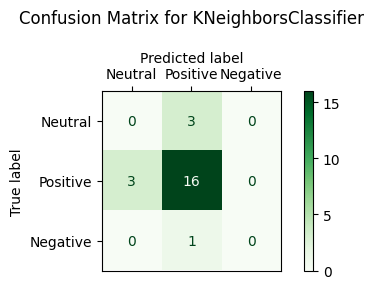

In [ ]:
# Check performance of the best model in training
eval_classification(best_model_container['KNeighborsClassifier'], X_test, y_test, title='Confusion Matrix for KNeighborsClassifier', classes=['Neutral', 'Positive', 'Negative'])

              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         3
    Positive       0.83      1.00      0.90        19
    Negative       0.00      0.00      0.00         1

    accuracy                           0.83        23
   macro avg       0.28      0.33      0.30        23
weighted avg       0.68      0.83      0.75        23



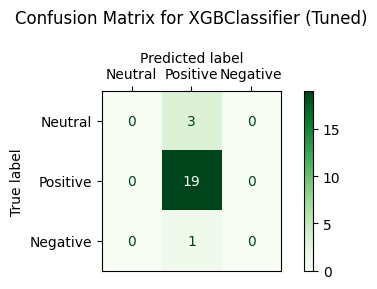

In [ ]:
# Check performance of the best model in training
eval_classification(best_model_container['XGBClassifier'], X_test, y_test, title='Confusion Matrix for XGBClassifier (Tuned)', classes=['Neutral', 'Positive', 'Negative'])

              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         3
    Positive       0.78      0.74      0.76        19
    Negative       0.00      0.00      0.00         1

    accuracy                           0.61        23
   macro avg       0.26      0.25      0.25        23
weighted avg       0.64      0.61      0.63        23



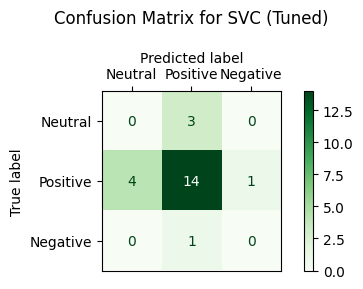

In [ ]:
eval_classification(best_model_container['SVC'], X_test, y_test, title='Confusion Matrix for SVC (Tuned)', classes=['Neutral', 'Positive', 'Negative'])

As you can see above, majority of the predictions fell on the Positive sentiment. This might be the case as there is an apparent class imbalance between the sentiment scores.

From the context of feedback interpretation based on the diagram above, this also suggests that our model predicts neutral-sentiment feedback to be positive, which can be helpful in boosting the morale of the evaluatees. However, negative-sentiment feedbacks also appear to be positive, which might be a negative enforcement as well for the evaluatees, as they might not be able to understand the true sentiment of the feedback because it appeared to be positive.

#### Part 4.4: Choosing the Right Model

As discussed above, the tuned models were able to achieve the best fit in both training and validation in terms of its F1 score. However, considering the initial models, it turns out that the initial untuned `KNeighborsClassifier` model had the best F1 score among all models trained and tested.

With this, we are able to conclude that for this dataset, **`KNeighborsClassifier` is the best fit model.**

              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         3
    Positive       0.80      0.84      0.82        19
    Negative       0.00      0.00      0.00         1

    accuracy                           0.70        23
   macro avg       0.27      0.28      0.27        23
weighted avg       0.66      0.70      0.68        23



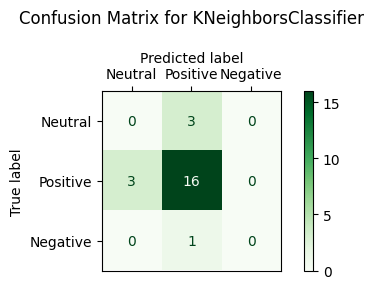

In [ ]:
eval_classification(model_container['KNeighborsClassifier'], X_test, y_test, title='Confusion Matrix for KNeighborsClassifier', classes=['Neutral', 'Positive', 'Negative'])

As you can see above, majority of the predictions fell on the Positive sentiment. This might be the case as there is an apparent class imbalance between the sentiment scores. It is almost the same with the tuned models, with one determining difference.

On the tuned models, the negative sentiment is being tagged as positive sentiment. This might result to a negative reinforced model, as it sets the evaluatee to perceive that feedbacks that are negative in nature, are treated as positive feedbacks. On the selected best model, the negative sentiment is tagged as neutral sentiment. This suggests that evaluatees are still not reinforced to take the feedback as a positive one, but a neutral one, which can be interpreted as either positive or negative.

From a feedback interpretation perspective, the best model enabled the evaluatees to identify and understand the sentiment of the feedbacks given to them relative to their performance rating, without giving them the impression of negatively reinforcing feedbacks, which will deter personal and professional improvement.

### Part 5: Model Export

Now we can finally save the models into a pickle file.

In [ ]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
# Import necessary modules for pickling
import pickle
import os

# Create a list of tuples for saving the selected models
models_to_save = [
    (best_model_container, 'SVC', 'tuned_svc_model.pkl'),
    (best_model_container, 'XGBClassifier', 'tuned_xgb_model.pkl'),
    (model_container, 'KNeighborsClassifier', 'init_knn_model.pkl')
]

# Iterate through the list of tuples
for container, key, filename in models_to_save:
    # Create the absolute path of the model pickle files
    model_pkl = "/content/drive/MyDrive/THESIS MODELS/" + filename

    # Create directory based on thge absolute path
    os.makedirs(os.path.dirname(model_pkl), exist_ok=True)

    # Create the pickled model
    with open(model_pkl, 'wb') as file:
        print(f'Saved {key} model in {model_pkl}')
        pickle.dump(container[key], file)